In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
nyc = pd.read_csv("HIV_AIDS_Diagnoses_by_Neighborhood__Sex__and_Race_Ethnicity.csv")
nyc

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,NaN,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,NaN,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,NaN,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,NaN,Willowbrook,Male,Unknown,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0
8972,2021,Staten\nIsland,Willowbrook,Male,Black,0,0,0,NaN,0,0
8973,2021,Staten\nIsland,Willowbrook,Male,Latino/Hispanic,1,18.2,0,0,0,0
8974,2021,Staten\nIsland,Willowbrook,Male,Other/Unknown,0,0,0,NaN,1,153


In [3]:
nyc.columns = ["Year", "Borough", "Neighborhood", "Sex", "Race/Ethinicity", "HIV Diagnoses", "HIV per 100,000", "Concurrent HIV/AIDS Diagnoses", "Proportion of concurrent", "AIDS Diagnoses", "AIDS per 100,000"]
nyc

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,NaN,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,NaN,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,NaN,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,NaN,Willowbrook,Male,Unknown,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0
8972,2021,Staten\nIsland,Willowbrook,Male,Black,0,0,0,NaN,0,0
8973,2021,Staten\nIsland,Willowbrook,Male,Latino/Hispanic,1,18.2,0,0,0,0
8974,2021,Staten\nIsland,Willowbrook,Male,Other/Unknown,0,0,0,NaN,1,153


In [4]:
#duplicates
dup_filter = nyc.duplicated()
nyc[dup_filter]


,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
7273,2020,Bronx,All,Female,Asian/Pacific\nIslander,0,0,0,NaN,0,0
7276,2020,Bronx,All,Female,Other/Unknown,0,0,0,NaN,0,0
7288,2020,Bronx,Crotona - Tremont,All,Other/Unknown,0,0,0,NaN,0,0
7291,2020,Bronx,Crotona - Tremont,Female,Asian/Pacific\nIslander,0,0,0,NaN,0,0
7294,2020,Bronx,Crotona - Tremont,Female,Other/Unknown,0,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8105,2020,Staten\nIsland,Willowbrook,Female,White,0,0,0,NaN,0,0
8107,2020,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,0,0,0,NaN,0,0
8109,2020,Staten\nIsland,Willowbrook,Male,Latino/Hispanic,0,0,0,NaN,0,0
8110,2020,Staten\nIsland,Willowbrook,Male,Other/Unknown,0,0,0,NaN,0,0


In [5]:
nyc = nyc.drop_duplicates() 
nyc

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,NaN,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,NaN,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,NaN,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,NaN,Willowbrook,Male,Unknown,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0
8972,2021,Staten\nIsland,Willowbrook,Male,Black,0,0,0,NaN,0,0
8973,2021,Staten\nIsland,Willowbrook,Male,Latino/Hispanic,1,18.2,0,0,0,0
8974,2021,Staten\nIsland,Willowbrook,Male,Other/Unknown,0,0,0,NaN,1,153


In [6]:
nyc.describe(include = ["O"])
#Borough is missing a whole lot of data

,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
count,5789,8717,8717,8717,8711,8643,8715,7073,8714,8646
unique,6,66,3,11,306,1260,121,305,238,991
top,Brooklyn,All,Male,All,0,0,0,0,0,0
freq,1448,754,3331,1520,2911,2893,4780,3176,3480,3459


In [7]:
missing_data = nyc["Borough"].isna()
nyc = nyc[~ missing_data] 
#nyc2.head()
nyc

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2928,2016,All,All,All,All,2235,31.2,367,16.4,1390,19.4
2929,2016,All,All,All,Asian/Pacific\nIslander,145,13.8,32,22.1,52,5
2930,2016,All,All,All,Black,933,58.4,171,18.3,668,41.8
2931,2016,All,All,All,Latino/Hispanic,792,39.6,115,14.5,474,23.7
2932,2016,All,All,All,Other/Unknown,27,22.9,6,22.2,13,11
...,...,...,...,...,...,...,...,...,...,...,...
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0
8972,2021,Staten\nIsland,Willowbrook,Male,Black,0,0,0,NaN,0,0
8973,2021,Staten\nIsland,Willowbrook,Male,Latino/Hispanic,1,18.2,0,0,0,0
8974,2021,Staten\nIsland,Willowbrook,Male,Other/Unknown,0,0,0,NaN,1,153


In [8]:
#nyc2.describe()
nyc.describe(include = ["O"])

,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
count,5789,5789,5789,5789,5783,5783,5787,4213,5786,5786
unique,6,43,3,6,280,1037,116,274,219,803
top,Brooklyn,All,All,All,0,0,0,0,0,0
freq,1448,750,1958,1000,1574,1574,2983,1409,2000,2000


In [9]:
missing_data = nyc["Proportion of concurrent"].isna()
nyc = nyc[~ missing_data] 
#nyc2.head()
nyc

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2928,2016,All,All,All,All,2235,31.2,367,16.4,1390,19.4
2929,2016,All,All,All,Asian/Pacific\nIslander,145,13.8,32,22.1,52,5
2930,2016,All,All,All,Black,933,58.4,171,18.3,668,41.8
2931,2016,All,All,All,Latino/Hispanic,792,39.6,115,14.5,474,23.7
2932,2016,All,All,All,Other/Unknown,27,22.9,6,22.2,13,11
...,...,...,...,...,...,...,...,...,...,...,...
8964,2021,Staten\nIsland,Willowbrook,Female,All,1,2.4,0,0,0,0
8969,2021,Staten\nIsland,Willowbrook,Female,White,1,4,0,0,0,0
8970,2021,Staten\nIsland,Willowbrook,Male,All,3,7.7,0,0,4,10.2
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0


In [10]:
nyc.describe(include = ["O"])

,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
count,4213,4213,4213,4213,4209,4209,4213,4213,4213,4213
unique,6,43,3,6,279,1036,116,274,219,757
top,Brooklyn,All,All,All,1,5,0,0,0,0
freq,1101,696,1619,968,759,26,1409,1409,693,693


In [11]:
missing_data = nyc["HIV Diagnoses"].isna()
nyc = nyc[~ missing_data] 
#nyc2.head()
nyc

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2928,2016,All,All,All,All,2235,31.2,367,16.4,1390,19.4
2929,2016,All,All,All,Asian/Pacific\nIslander,145,13.8,32,22.1,52,5
2930,2016,All,All,All,Black,933,58.4,171,18.3,668,41.8
2931,2016,All,All,All,Latino/Hispanic,792,39.6,115,14.5,474,23.7
2932,2016,All,All,All,Other/Unknown,27,22.9,6,22.2,13,11
...,...,...,...,...,...,...,...,...,...,...,...
8964,2021,Staten\nIsland,Willowbrook,Female,All,1,2.4,0,0,0,0
8969,2021,Staten\nIsland,Willowbrook,Female,White,1,4,0,0,0,0
8970,2021,Staten\nIsland,Willowbrook,Male,All,3,7.7,0,0,4,10.2
8971,2021,Staten\nIsland,Willowbrook,Male,Asian/Pacific\nIslander,2,24.2,0,0,0,0


In [12]:
nyc.describe(include = ["O"])
#removed 8976  - 4209 rows

,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
count,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209
unique,6,43,3,6,279,1036,116,274,219,757
top,Brooklyn,All,All,All,1,5,0,0,0,0
freq,1101,696,1618,968,759,26,1405,1405,689,689


In [13]:
nyc.dtypes

Year                              int64
Borough                          object
Neighborhood                     object
Sex                              object
Race/Ethinicity                  object
HIV Diagnoses                    object
HIV per 100,000                  object
Concurrent HIV/AIDS Diagnoses    object
Proportion of concurrent         object
AIDS Diagnoses                   object
AIDS per 100,000                 object
dtype: object

In [14]:
#convert datatypes 


In [15]:
columns_to_convert = ["HIV Diagnoses", "AIDS Diagnoses", "Concurrent HIV/AIDS Diagnoses"]
nyc.loc[:, columns_to_convert] = nyc[columns_to_convert].astype(int)
nyc.dtypes

/tmp/ipykernel_398/1118448238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc.loc[:, columns_to_convert] = nyc[columns_to_convert].astype(int)


Year                              int64
Borough                          object
Neighborhood                     object
Sex                              object
Race/Ethinicity                  object
HIV Diagnoses                     int64
HIV per 100,000                  object
Concurrent HIV/AIDS Diagnoses     int64
Proportion of concurrent         object
AIDS Diagnoses                    int64
AIDS per 100,000                 object
dtype: object

In [16]:
columns_to_convert = ["HIV per 100,000", "Proportion of concurrent", "AIDS per 100,000"]
nyc.loc[:, columns_to_convert] = nyc[columns_to_convert].astype(float)
nyc.dtypes


/tmp/ipykernel_398/1847473969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc.loc[:, columns_to_convert] = nyc[columns_to_convert].astype(float)


Year                               int64
Borough                           object
Neighborhood                      object
Sex                               object
Race/Ethinicity                   object
HIV Diagnoses                      int64
HIV per 100,000                  float64
Concurrent HIV/AIDS Diagnoses      int64
Proportion of concurrent         float64
AIDS Diagnoses                     int64
AIDS per 100,000                 float64
dtype: object

In [17]:
#comparison by Borough
ovr_all = nyc[(nyc['Borough'] != 'All') & (nyc['Neighborhood'] == 'All') & (nyc['Race/Ethinicity'] == 'All')& (nyc['Sex'] == 'All')]
ovr_all = ovr_all.drop([7266,7410,7626,7824, 8022])
ovr_all

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2946,2016,Bronx,All,All,All,489,41.5,94,19.2,337,28.6
3090,2016,Brooklyn,All,All,All,566,26.2,102,18.0,332,15.4
3306,2016,Manhattan,All,All,All,423,29.3,61,14.4,235,16.3
3504,2016,Queens,All,All,All,399,20.2,76,19.0,207,10.5
3702,2016,Staten\nIsland,All,All,All,78,19.5,16,20.5,36,9.0
3810,2017,Bronx,All,All,All,447,38.0,75,16.8,303,25.7
3954,2017,Brooklyn,All,All,All,605,28.2,122,20.2,350,16.3
4170,2017,Manhattan,All,All,All,387,26.9,60,15.5,209,14.5
4369,2017,Queens,All,All,All,384,19.5,69,18.0,173,8.8
4566,2017,Staten\nIsland,All,All,All,38,9.4,9,23.7,29,7.2


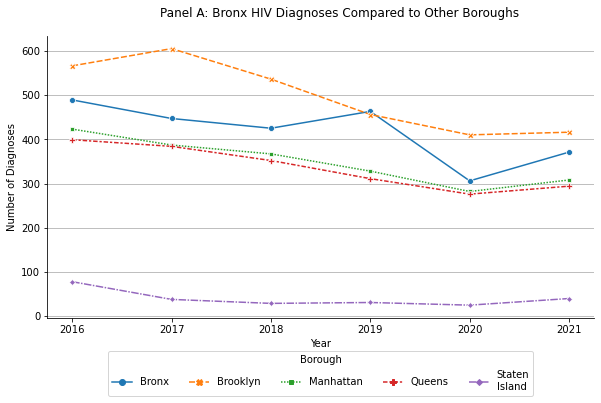

In [96]:
g = sns.relplot(x = "Year", y = "HIV Diagnoses", kind = "line", hue = "Borough",style = "Borough", data = ovr_all, markers = True, aspect = 1.7)
g.fig.suptitle("Panel A: Bronx HIV Diagnoses Compared to Other Boroughs")
g.set_axis_labels("Year", "Number of Diagnoses") 
g.set_titles("") 
g.set(xticks=ovr_all["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Borough", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

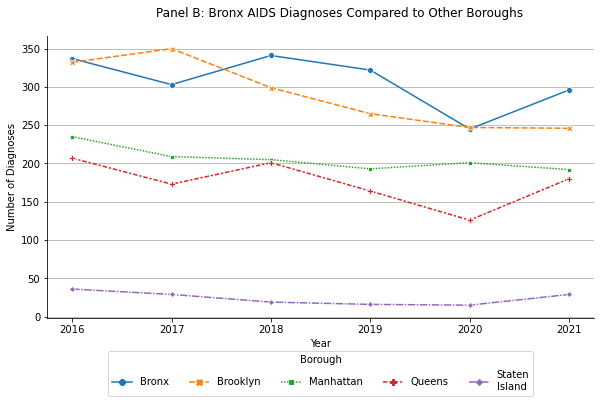

In [118]:
g = sns.relplot(x = "Year", y = "AIDS Diagnoses", kind = "line", hue = "Borough",style = "Borough", markers = True, data = ovr_all, aspect = 1.7)
g.fig.suptitle("Panel B: Bronx AIDS Diagnoses Compared to Other Boroughs")
g.set_axis_labels("Year", "Number of Diagnoses") 
g.set_titles("") 
g.set(xticks=ovr_all["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Borough", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

In [20]:
ovr_all.groupby("Borough").sum() 

,Year,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
Borough,,,,,,,
Bronx,12111,2501,213.7,447,106.6,1844,157.6
Brooklyn,12111,2989,139.2,575,116.0,1739,81.1
Manhattan,12111,2095,146.3,343,99.2,1235,86.3
Queens,12111,2016,103.0,418,125.1,1051,53.7
Staten\nIsland,12111,241,59.6,47,111.9,144,35.5


In [21]:
ovr_all["Concurrent HIV/AIDS Diagnoses"].sum()/ovr_all["HIV Diagnoses"].sum()

1.8593781751676489e-01

In [22]:
ovr_all["Concurrent HIV/AIDS Diagnoses"].sum()

1830

In [23]:
ovr_all["HIV Diagnoses"].sum()

9842

In [24]:
ovr_all.groupby("Borough").mean() 

,Year,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
Borough,,,,,,,
Bronx,2018.5,416.833333,35.616667,74.500000,17.766667,307.333333,26.266667
Brooklyn,2018.5,498.166667,23.200000,95.833333,19.333333,289.833333,13.516667
Manhattan,2018.5,349.166667,24.383333,57.166667,16.533333,205.833333,14.383333
Queens,2018.5,336.000000,17.166667,69.666667,20.850000,175.166667,8.950000
Staten\nIsland,2018.5,40.166667,9.933333,7.833333,18.650000,24.000000,5.916667


In [25]:
ovr_all.groupby("Year").sum() 

,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
Year,,,,,,
2016,1955,136.7,349,91.1,1147,79.8
2017,1861,122.0,335,94.2,1064,72.5
2018,1709,112.1,332,92.4,1065,72.3
2019,1589,107.7,274,83.3,960,66.1
2020,1299,86.4,254,93.3,834,57.4
2021,1429,96.9,286,104.5,943,66.1


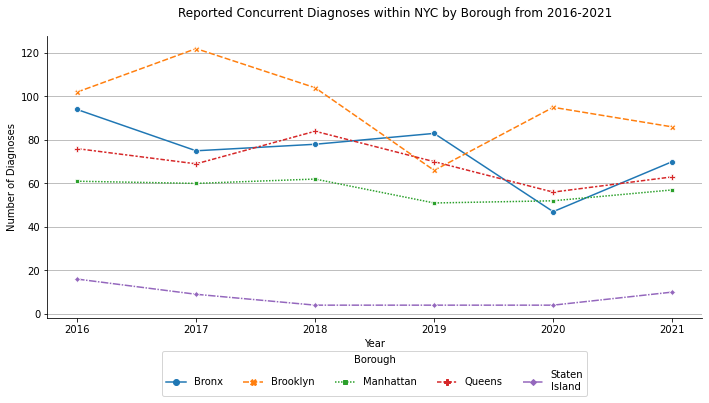

In [100]:
g = sns.relplot(x = "Year", y = "Concurrent HIV/AIDS Diagnoses", kind = "line", hue = "Borough",style = "Borough", markers = True, data = ovr_all, aspect = 2)
#for i in range(len(ovr_all)):
#       plt.text(ovr_all['Year'].iloc[i], ovr_all['Concurrent HIV/AIDS Diagnoses'].iloc[i], 
#              str(ovr_all['Concurrent HIV/AIDS Diagnoses'].iloc[i]), fontsize=9, ha='center')
g.fig.suptitle("Reported Concurrent Diagnoses within NYC by Borough from 2016-2021")
g.set_axis_labels("Year", "Number of Diagnoses") 
g.set_titles("") 
g.set(xticks=ovr_all["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Borough", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

In [27]:
kings_filter = nyc["Borough"] == "Brooklyn"
nyc_kings = nyc[kings_filter]
#nyc_kings

In [28]:
brook_race_filter = nyc_kings[(nyc_kings["Neighborhood"] == "All") & (nyc_kings["Race/Ethinicity"] != "All") & (nyc_kings["Sex"] == "All")]
#brook_race_filter

In [29]:
man_filter = nyc["Borough"] == "Manhattan"
nyc_man = nyc[man_filter]
#nyc_man

In [30]:
man_race_filter = nyc_man[(nyc_man["Neighborhood"] == "All") & (nyc_man["Race/Ethinicity"] != "All") & (nyc_man["Sex"] == "All")]
#man_race_filter

In [31]:
queens_filter = nyc["Borough"] == "Queens"
nyc_queens = nyc[queens_filter]
queens_race_filter = nyc_queens[(nyc_queens["Neighborhood"] == "All") & (nyc_queens["Race/Ethinicity"] != "All") & (nyc_queens["Sex"] == "All")]
#queens_race_filter

In [32]:
si_filter = nyc["Borough"] == "Staten\nIsland"
nyc_si = nyc[si_filter]
si_race_filter = nyc_si[(nyc_si["Neighborhood"] == "All") & (nyc_si["Race/Ethinicity"] != "All") & (nyc_si["Sex"] == "All")]
#si_race_filter

In [33]:
#per race population
race_filter = nyc[(nyc["Borough"] != "All")& (nyc["Neighborhood"] == "All") & (nyc["Race/Ethinicity"] != "All") & (nyc["Sex"] == "All")]
race_filter = race_filter.drop([7267,7268,7269,7271,7411, 7412,7413,7414,7415,7627,7628,7629,7630,7631,7825,7826,7827,7828,7829,8023,8024,8025,8026,8027])
#pd.set_option('display.max_rows', None)#shows all the rows
race_filter

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2947,2016,Bronx,All,All,Asian/Pacific\nIslander,8,16.9,1,12.5,4,8.4
2948,2016,Bronx,All,All,Black,234,66.7,56,23.9,162,46.2
2949,2016,Bronx,All,All,Latino/Hispanic,231,35.7,36,15.6,160,24.8
2950,2016,Bronx,All,All,Other/Unknown,3,22.7,1,33.3,2,15.2
2951,2016,Bronx,All,All,White,13,10.8,0,0.0,9,7.5
...,...,...,...,...,...,...,...,...,...,...,...
8693,2021,Queens,All,All,White,21,4.1,3,14.3,13,2.6
8887,2021,Staten\nIsland,All,All,Asian/Pacific\nIslander,2,4.0,0,0.0,0,0.0
8888,2021,Staten\nIsland,All,All,Black,18,47.8,4,22.2,12,31.9
8889,2021,Staten\nIsland,All,All,Latino/Hispanic,10,13.6,3,30.0,10,13.6


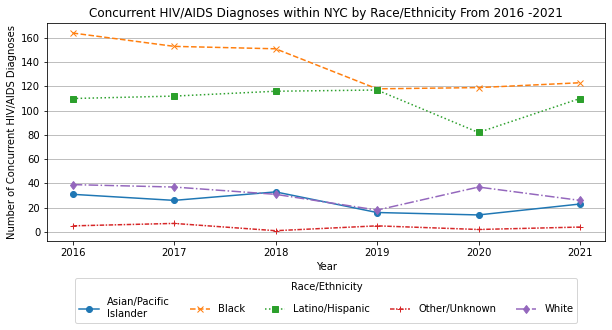

In [105]:
#concurrent by race
width = 10
height = 4

plt.figure(figsize=(width, height))

race_year_cc = race_filter.groupby(["Year", "Race/Ethinicity"])["Concurrent HIV/AIDS Diagnoses"].sum().unstack().fillna(0)

markers = ['o', 'x', 's', '+', 'd']
linestyles = ['-', '--', ':', (0, (3, 1, 1, 1)),'-.']
columns = race_year_cc.columns
for i, column in enumerate(columns):
     marker = markers[i % len(markers)]
     linestyle = linestyles[i % len(linestyles)]
     race_year_cc[column].plot(kind='line', marker=marker, linestyle = linestyle, label=column)

plt.title("Concurrent HIV/AIDS Diagnoses within NYC by Race/Ethnicity From 2016 -2021")
plt.xlabel('Year')
plt.ylabel('Number of Concurrent HIV/AIDS Diagnoses')
plt.grid(axis = "y")
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(0.5,-0.15), loc='upper center',  ncol=5)
#plt.tight_layout()

#for line in ax.get_lines():
#    data = line.get_xydata()
#    for x, y in data:
#        if y != 0:  # Add a condition to avoid annotating zero values if desired
#            ax.text(x, y, f'{int(y)}', fontsize=9, ha='right', va='bottom')

In [35]:
race_year_cc

Race/Ethinicity,Asian/Pacific\nIslander,Black,Latino/Hispanic,Other/Unknown,White
Year,,,,,
2016,31,164,110,5,39
2017,26,153,112,7,37
2018,33,151,116,1,31
2019,16,118,117,5,18
2020,14,119,82,2,37
2021,23,123,110,4,26


In [36]:
race_year_cc.sum()

Race/Ethinicity
Asian/Pacific\nIslander    143
Black                      828
Latino/Hispanic            647
Other/Unknown               24
White                      188
dtype: int64

In [37]:
143+828+647+24+188

1830

In [38]:
cc2021 = 23+123+110+4+26
cc2016 = 31	+164+110+5+39


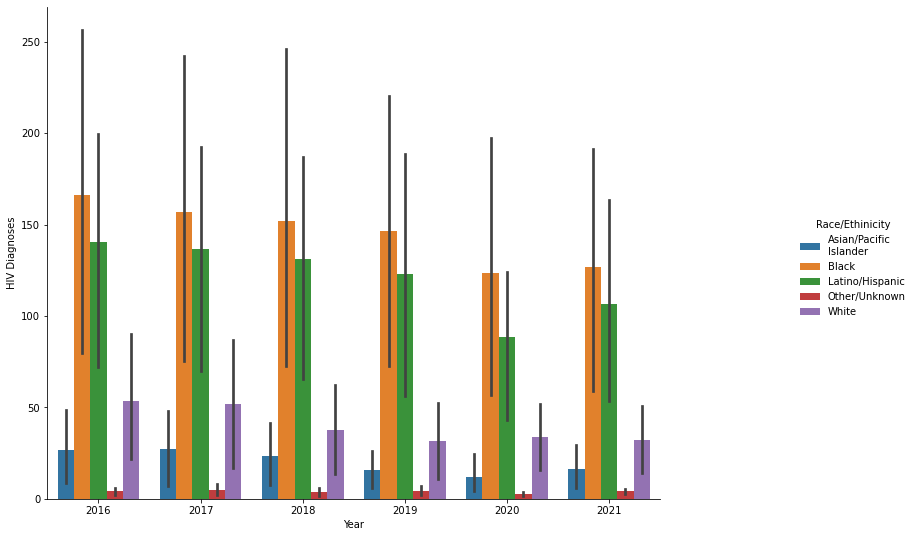

In [39]:
race_year_hiv = sns.catplot(x = "Year", y = "HIV Diagnoses", hue = "Race/Ethinicity",kind = "bar", data = race_filter)
race_year_hiv.fig.set_size_inches(14,8)

<AxesSubplot:xlabel='Year'>

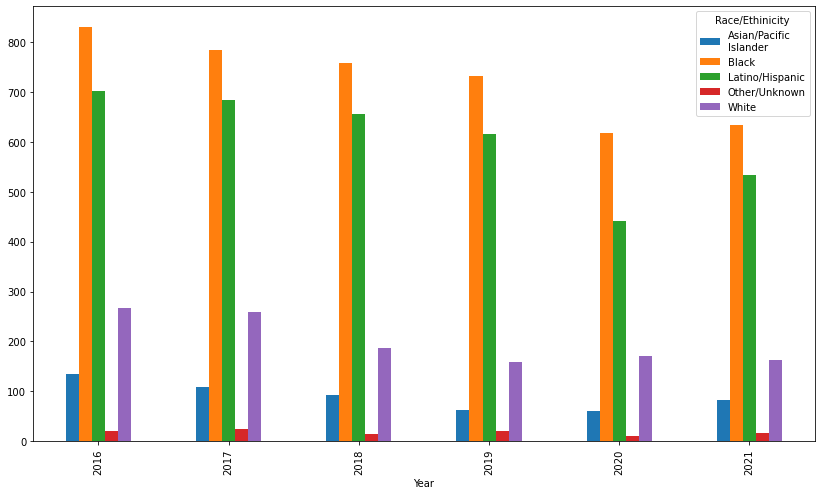

In [40]:
race_year_hiv = race_filter.groupby(["Year", "Race/Ethinicity"])["HIV Diagnoses"].sum().unstack().fillna(0)
race_year_hiv.plot(kind='bar', figsize=(14, 8))

In [41]:
#working here
race_year_hiv

Race/Ethinicity,Asian/Pacific\nIslander,Black,Latino/Hispanic,Other/Unknown,White
Year,,,,,
2016,134,830,703,20,268
2017,109,784,684,25,259
2018,93,759,656,14,187
2019,63,732,615,21,158
2020,60,617,442,10,170
2021,82,634,534,17,162


In [42]:
by_population = race_filter[["Year", "Borough", "Race/Ethinicity", "HIV Diagnoses","AIDS Diagnoses"]]
#pd.set_option('display.max_rows', None)#shows all the rows
by_population

#population_data = [

,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses
2947,2016,Bronx,Asian/Pacific\nIslander,8,4
2948,2016,Bronx,Black,234,162
2949,2016,Bronx,Latino/Hispanic,231,160
2950,2016,Bronx,Other/Unknown,3,2
2951,2016,Bronx,White,13,9
...,...,...,...,...,...
8693,2021,Queens,White,21,13
8887,2021,Staten\nIsland,Asian/Pacific\nIslander,2,0
8888,2021,Staten\nIsland,Black,18,12
8889,2021,Staten\nIsland,Latino/Hispanic,10,10


In [43]:
#merging both dataset
#population_data = pd.read_csv("Per Population.csv")
#same_columns = ["Year",	"Borough",	"Race/Ethinicity"]	
#merged_df = pd.merge(by_population, population_data,on = same_columns, how='left')

#merged_df["Race Population"] = merged_df["Race Population"].str.replace(",","")
#merged_df["Race Population"].fillna(52330,317252, inplace = True)
 
#merged_df["Race Population"] = merged_df["Race Population"].astype(int)
#merged_df = merged_df.fillna(replace_values)
#merged_df


In [44]:
by_population.describe()

,Year,HIV Diagnoses,AIDS Diagnoses
count,144.000000,144.000000,144.000000
mean,2018.486111,68.347222,41.736111
std,1.725928,79.875105,52.206420
min,2016.000000,1.000000,0.000000
25%,2017.000000,7.750000,4.000000
50%,2018.500000,26.000000,14.000000
75%,2020.000000,114.000000,66.500000
max,2021.000000,348.000000,210.000000


In [45]:
#bronx,kings,manhattan,queens,richmond

population_data = [52330,495031,815422,528863,312877,317252,861749,505183,237591
,1124155,205639,246095,427224,179384,931953,594162,421307,653694,318657,905860
,41468,48920,87567,22464,352530,58817,517433,826176,505698,328383,325263,850150
,506635,241515,1145345,208733,247139,435002,200412,925117,618516,427999,660550
,339412,885312,51411,89066,20230,351632,56412,509310,807228,473965,321890,301602
,827041,492700,226874,1125773,201129,236356,421023,193696,904573,589499,419389
,639612,325379
,848180
,47098
,88888
,347986
,54763
,542543
,799580
,429572
,321736
,307209
,820016
,483678
,222349
,1115915
,202370
,233945
,416758
,194114
,922746
,589994
,415664
,634934
,328194
,821416
,47951
,88638
,16010
,349964
,57148
,497301
,799765
,306569
,308175
,806746
,486272
,228625
,1103205
,199450
,233476
,418442
,190559
,898723
,590025
,409975
,631657
,311820
,814353
,47746
,48623
,87733
,18419
,340436
,57089
,436782
,804122
,486326
,182295
,321457
,733243
,496797
,281324
,987830
,187748
,216224
,415702
,219188
,740303
,600913
,393874
,655419
,392976
,610897
,57035
,47516
,92080,296700]

by_population["Race Population"] = population_data
by_population


 
 
 


/tmp/ipykernel_398/4072638499.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_population["Race Population"] = population_data


,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses,Race Population
2947,2016,Bronx,Asian/Pacific\nIslander,8,4,52330
2948,2016,Bronx,Black,234,162,495031
2949,2016,Bronx,Latino/Hispanic,231,160,815422
2950,2016,Bronx,Other/Unknown,3,2,528863
2951,2016,Bronx,White,13,9,312877
...,...,...,...,...,...,...
8693,2021,Queens,White,21,13,610897
8887,2021,Staten\nIsland,Asian/Pacific\nIslander,2,0,57035
8888,2021,Staten\nIsland,Black,18,12,47516
8889,2021,Staten\nIsland,Latino/Hispanic,10,10,92080


In [46]:
#ovr_all["Race Population"] = population_data
by_population ["HIV per Race"] = (by_population["HIV Diagnoses"] / by_population["Race Population"]) * 100000
by_population ["AIDS per Race"] = (by_population["AIDS Diagnoses"]/by_population["Race Population"]) * 100000
by_population

/tmp/ipykernel_398/3124757053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_population ["HIV per Race"] = (by_population["HIV Diagnoses"] / by_population["Race Population"]) * 100000
/tmp/ipykernel_398/3124757053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_population ["AIDS per Race"] = (by_population["AIDS Diagnoses"]/by_population["Race Population"]) * 100000


,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
2947,2016,Bronx,Asian/Pacific\nIslander,8,4,52330,15.287598,7.643799
2948,2016,Bronx,Black,234,162,495031,47.269767,32.725223
2949,2016,Bronx,Latino/Hispanic,231,160,815422,28.328890,19.621742
2950,2016,Bronx,Other/Unknown,3,2,528863,0.567255,0.378170
2951,2016,Bronx,White,13,9,312877,4.154987,2.876530
...,...,...,...,...,...,...,...,...
8693,2021,Queens,White,21,13,610897,3.437568,2.128018
8887,2021,Staten\nIsland,Asian/Pacific\nIslander,2,0,57035,3.506619,0.000000
8888,2021,Staten\nIsland,Black,18,12,47516,37.881977,25.254651
8889,2021,Staten\nIsland,Latino/Hispanic,10,10,92080,10.860122,10.860122


In [48]:
#Da Bronx HIV?AIDS per race
da_bx = by_population["Borough"] == "Bronx"
bx_per_races=by_population[da_bx]
bx_per_races

,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
2947,2016,Bronx,Asian/Pacific\nIslander,8,4,52330,15.287598,7.643799
2948,2016,Bronx,Black,234,162,495031,47.269767,32.725223
2949,2016,Bronx,Latino/Hispanic,231,160,815422,28.328890,19.621742
2950,2016,Bronx,Other/Unknown,3,2,528863,0.567255,0.378170
2951,2016,Bronx,White,13,9,312877,4.154987,2.876530
3811,2017,Bronx,Asian/Pacific\nIslander,2,3,58817,3.400377,5.100566
3812,2017,Bronx,Black,208,165,517433,40.198441,31.888186
3813,2017,Bronx,Latino/Hispanic,218,124,826176,26.386629,15.008909
3814,2017,Bronx,Other/Unknown,1,3,505698,0.197746,0.593239
3815,2017,Bronx,White,18,8,328383,5.481404,2.436180


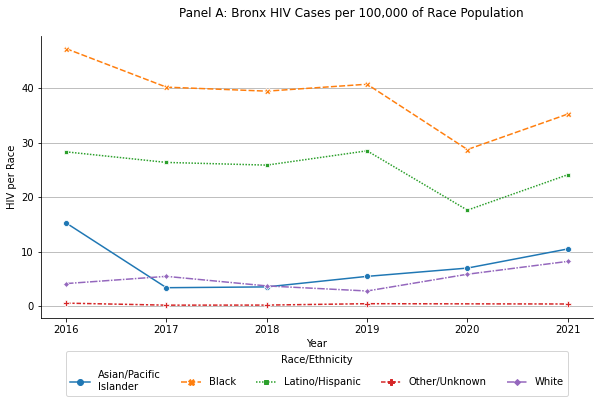

In [124]:
g = sns.relplot(x = "Year", y = "HIV per Race", kind = "line", hue = "Race/Ethinicity",style ="Race/Ethinicity", markers = True, data = bx_per_races, ci = None, aspect = 1.7)
g.fig.suptitle("Panel A: Bronx HIV Cases per 100,000 of Race Population")
g.set_axis_labels("Year", "HIV per Race") 
g.set_titles("") 
g.set(xticks=bx_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

In [123]:
black_bx = bx_per_races["Race/Ethinicity"] == "Black"
blacksss= bx_per_races[black_bx]
blacksss

,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
2948,2016,Bronx,Black,234,162,495031,47.269767,32.725223
3812,2017,Bronx,Black,208,165,517433,40.198441,31.888186
4676,2018,Bronx,Black,201,188,509310,39.465159,36.912686
5540,2019,Bronx,Black,221,162,542543,40.734098,29.859384
6404,2020,Bronx,Black,143,128,497301,28.755221,25.738939
8132,2021,Bronx,Black,154,153,436782,35.257863,35.028916


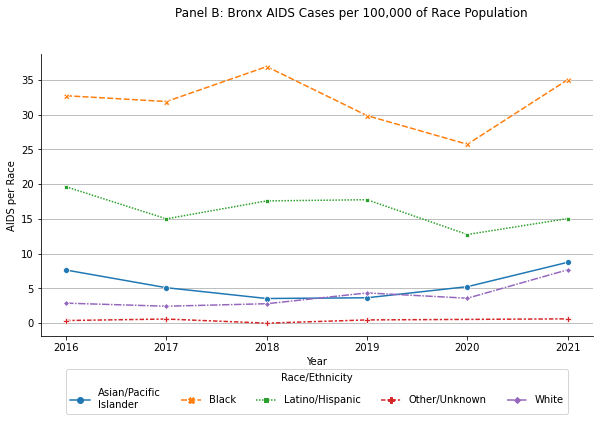

In [126]:
#fixes legend problem
g = sns.relplot( x="Year", y="AIDS per Race", kind="line", hue= "Race/Ethinicity", style="Race/Ethinicity", markers=True, data=bx_per_races, ci=None, aspect = 1.7)
# Add titles and labels
g.fig.suptitle("Panel B: Bronx AIDS Cases per 100,000 of Race Population", y=1.03)
g.set_axis_labels("Year", "AIDS per Race") 
g.set_titles("") 
g.set(xticks=bx_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9) # Adjust the title position 
# Remove the legend created by default
g._legend.remove() 
# Add a new legend at the bottom 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) # Display the plot 
plt.grid(axis = "y")
plt.show()


In [52]:
bx_per_races.groupby("Race/Ethinicity").mean() 

,Year,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
Race/Ethinicity,,,,,,
Asian/Pacific\nIslander,2018.5,4.166667,3.166667,56093.166667,7.536791,5.658266
Black,2018.5,193.500000,159.666667,499733.333333,38.613425,32.025556
Latino/Hispanic,2018.5,203.500000,131.833333,808715.500000,25.146239,16.297042
Other/Unknown,2018.2,1.800000,2.000000,484884.800000,0.370563,0.410772
White,2018.5,14.166667,10.833333,295625.000000,5.043592,3.954675


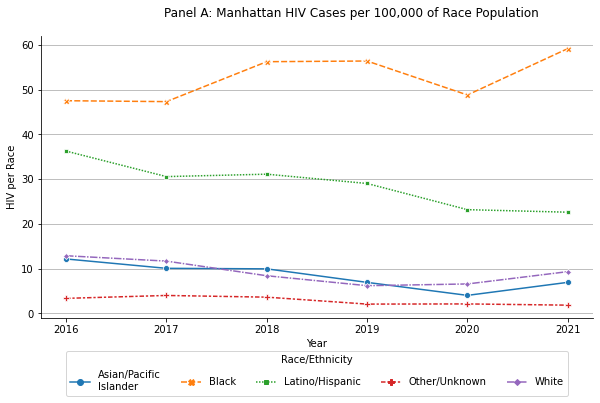

In [127]:
manhattan = by_population["Borough"] == "Manhattan"
manhat_per_races =by_population[manhattan]
#manhat_per_races
g=sns.relplot(x="Year", y= "HIV per Race", hue = "Race/Ethinicity",kind = "line", style ="Race/Ethinicity", markers = True,data = manhat_per_races, ci = None, aspect = 1.7)
g.fig.suptitle("Panel A: Manhattan HIV Cases per 100,000 of Race Population")
g.set_axis_labels("Year", "HIV per Race") 
g.set_titles("") 
g.set(xticks=manhat_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")


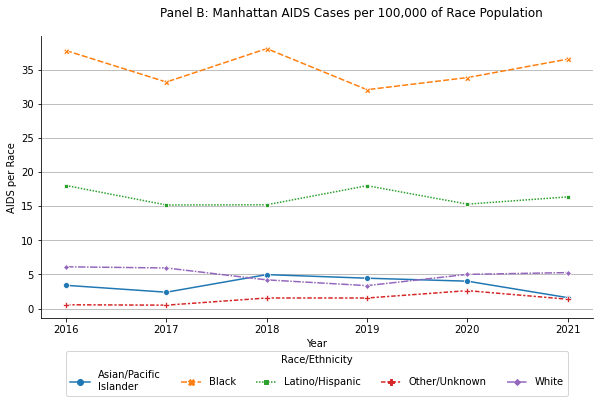

In [128]:
g=sns.relplot(x="Year", y= "AIDS per Race", hue = "Race/Ethinicity",kind = "line", style ="Race/Ethinicity", markers = True,data = manhat_per_races, ci = None, aspect = 1.7)
g.fig.suptitle("Panel B: Manhattan AIDS Cases per 100,000 of Race Population")
g.set_axis_labels("Year", "AIDS per Race") 
g.set_titles("") 
g.set(xticks=manhat_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

In [55]:
manhat_per_races

,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
3307,2016,Manhattan,Asian/Pacific\nIslander,25,7,205639,12.157227,3.404024
3308,2016,Manhattan,Black,117,93,246095,47.542616,37.790284
3309,2016,Manhattan,Latino/Hispanic,155,77,427224,36.280733,18.023332
3310,2016,Manhattan,Other/Unknown,6,1,179384,3.344780,0.557463
3311,2016,Manhattan,White,120,57,931953,12.876186,6.116188
4171,2017,Manhattan,Asian/Pacific\nIslander,21,5,208733,10.060700,2.395405
4172,2017,Manhattan,Black,117,82,247139,47.341779,33.179709
4173,2017,Manhattan,Latino/Hispanic,133,66,435002,30.574572,15.172344
4174,2017,Manhattan,Other/Unknown,8,1,200412,3.991777,0.498972
4175,2017,Manhattan,White,108,55,925117,11.674199,5.945194


In [56]:
manhat_per_races.groupby("Race/Ethinicity").mean() 

,Year,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
Race/Ethinicity,,,,,,
Asian/Pacific\nIslander,2018.5,16.833333,7.000000,200844.833333,8.335837,3.471263
Black,2018.5,123.500000,83.000000,235539.166667,52.600687,35.246600
Latino/Hispanic,2018.5,121.833333,69.000000,422358.500000,28.799535,16.340917
Other/Unknown,2018.5,5.500000,2.666667,196225.500000,2.822519,1.357214
White,2018.5,81.500000,44.166667,887235.833333,9.169122,4.982836


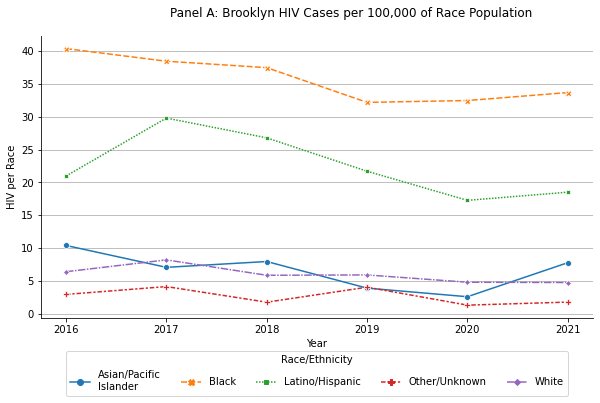

In [129]:
brook = by_population["Borough"] == "Brooklyn"
brook_per_races =by_population[brook]

g = sns.relplot(x="Year", y= "HIV per Race", hue = "Race/Ethinicity",kind = "line",style ="Race/Ethinicity", markers = True, data = brook_per_races, ci = None, aspect = 1.7)
g.fig.suptitle("Panel A: Brooklyn HIV Cases per 100,000 of Race Population")
g.set_axis_labels("Year", "HIV per Race") 
g.set_titles("") 
g.set(xticks= brook_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

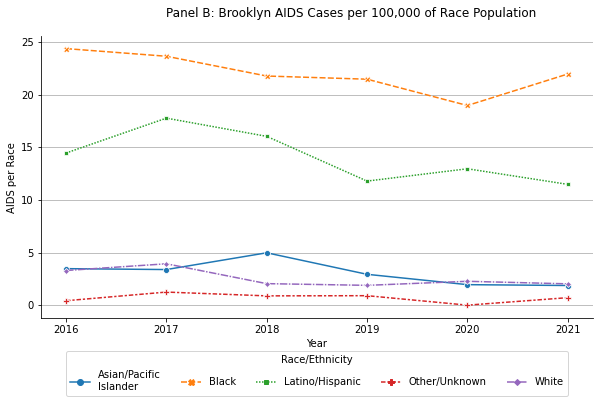

In [130]:
g = sns.relplot(x="Year", y= "AIDS per Race", hue = "Race/Ethinicity",kind = "line", style ="Race/Ethinicity", markers = True,data = brook_per_races, ci = None, aspect = 1.7)
g.fig.suptitle("Panel B: Brooklyn AIDS Cases per 100,000 of Race Population")
g.set_axis_labels("Year", "AIDS per Race") 
g.set_titles("") 
g.set(xticks= brook_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

In [59]:
brook_per_races

,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
3091,2016,Brooklyn,Asian/Pacific\nIslander,33,11,317252,10.401826,3.467275
3092,2016,Brooklyn,Black,348,210,861749,40.382989,24.369045
3093,2016,Brooklyn,Latino/Hispanic,106,73,505183,20.982495,14.450209
3094,2016,Brooklyn,Other/Unknown,7,1,237591,2.946240,0.420891
3095,2016,Brooklyn,White,72,37,1124155,6.404811,3.291361
3955,2017,Brooklyn,Asian/Pacific\nIslander,23,11,325263,7.071201,3.381879
3956,2017,Brooklyn,Black,327,201,850150,38.463801,23.642887
3957,2017,Brooklyn,Latino/Hispanic,151,90,506635,29.804494,17.764268
3958,2017,Brooklyn,Other/Unknown,10,3,241515,4.140530,1.242159
3959,2017,Brooklyn,White,94,45,1145345,8.207134,3.928947


In [60]:
brook_per_races.groupby("Race/Ethinicity").mean() 

,Year,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
Race/Ethinicity,,,,,,
Asian/Pacific\nIslander,2018.5,20.833333,9.666667,3.134930e+05,6.618281,3.094274
Black,2018.5,293.000000,180.166667,8.164908e+05,35.781070,22.026932
Latino/Hispanic,2018.5,111.666667,69.833333,4.952108e+05,22.513285,14.077081
Other/Unknown,2018.5,6.333333,1.666667,2.397130e+05,2.664509,0.692501
White,2018.5,66.333333,28.500000,1.100370e+06,5.991850,2.572663


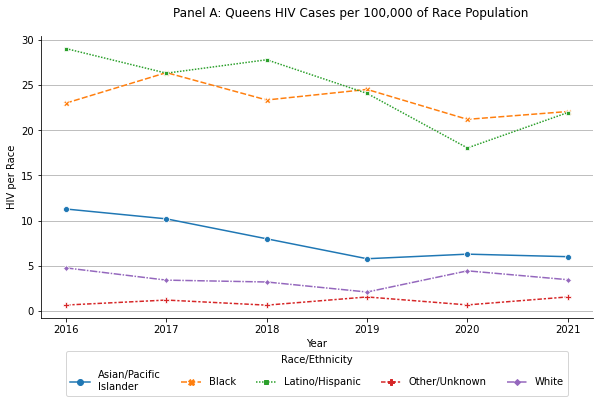

In [131]:
queens = by_population["Borough"] == "Queens"
queens_per_races =by_population[queens]

g = sns.relplot(x="Year", y= "HIV per Race", hue = "Race/Ethinicity",kind = "line",style ="Race/Ethinicity", markers = True, data = queens_per_races, ci = None, aspect = 1.7)
g.fig.suptitle("Panel A: Queens HIV Cases per 100,000 of Race Population")
g.set_axis_labels("Year", "HIV per Race") 
g.set_titles("") 
g.set(xticks= queens_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

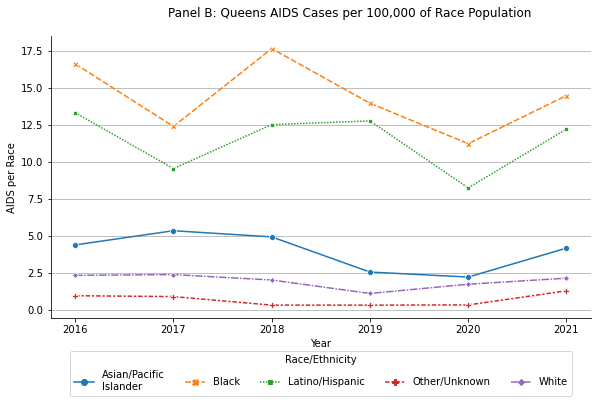

In [132]:
g = sns.relplot(x="Year", y= "AIDS per Race", hue = "Race/Ethinicity",kind = "line",style ="Race/Ethinicity", markers = True, data = queens_per_races, ci = None, aspect = 1.7)
g.fig.suptitle("Panel B: Queens AIDS Cases per 100,000 of Race Population")
g.set_axis_labels("Year", "AIDS per Race") 
g.set_titles("") 
g.set(xticks= queens_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

In [63]:
queens_per_races

,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
3505,2016,Queens,Asian/Pacific\nIslander,67,26,594162,11.276386,4.375911
3506,2016,Queens,Black,97,70,421307,23.023591,16.614962
3507,2016,Queens,Latino/Hispanic,190,87,653694,29.065587,13.308979
3508,2016,Queens,Other/Unknown,2,3,318657,0.627634,0.941451
3509,2016,Queens,White,43,21,905860,4.746870,2.318239
4370,2017,Queens,Asian/Pacific\nIslander,63,33,618516,10.185670,5.335351
4371,2017,Queens,Black,113,53,427999,26.401931,12.383207
4372,2017,Queens,Latino/Hispanic,174,63,660550,26.341685,9.537507
4373,2017,Queens,Other/Unknown,4,3,339412,1.178509,0.883882
4374,2017,Queens,White,30,21,885312,3.388636,2.372045


In [64]:
queens_per_races.groupby("Race/Ethinicity").mean() 

,Year,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
Race/Ethinicity,,,,,,
Asian/Pacific\nIslander,2018.5,47.333333,23.500000,597184.833333,7.909917,3.922787
Black,2018.5,97.333333,59.666667,414701.333333,23.440165,14.381382
Latino/Hispanic,2018.5,158.833333,73.833333,645977.666667,24.558681,11.424925
Other/Unknown,2018.5,3.500000,2.333333,336073.000000,1.018751,0.671734
White,2018.5,29.000000,15.833333,814336.333333,3.541108,1.939570


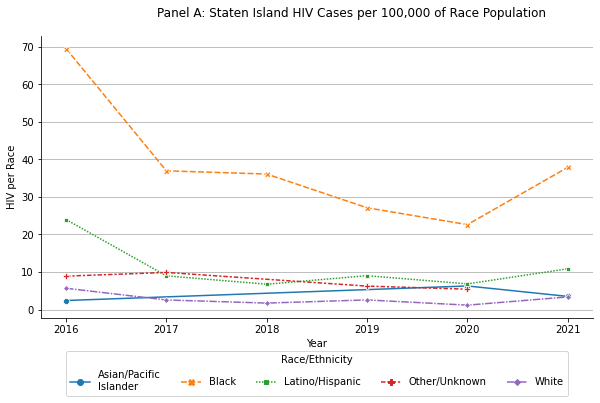

In [133]:
stiland = by_population["Borough"] == "Staten\nIsland"
si_per_races =by_population[stiland]

g = sns.relplot(x="Year", y= "HIV per Race", hue = "Race/Ethinicity",kind = "line",style ="Race/Ethinicity", markers = True, data = si_per_races, ci = None, aspect = 1.7)
g.fig.suptitle("Panel A: Staten Island HIV Cases per 100,000 of Race Population")
g.set_axis_labels("Year", "HIV per Race") 
g.set_titles("") 
g.set(xticks= si_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

In [66]:
si_per_races

,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
3703,2016,Staten\nIsland,Asian/Pacific\nIslander,1,0,41468,2.411498,0.000000
3704,2016,Staten\nIsland,Black,34,21,48920,69.501226,42.927228
3705,2016,Staten\nIsland,Latino/Hispanic,21,10,87567,23.981637,11.419827
3706,2016,Staten\nIsland,Other/Unknown,2,0,22464,8.903134,0.000000
3707,2016,Staten\nIsland,White,20,5,352530,5.673276,1.418319
4568,2017,Staten\nIsland,Black,19,15,51411,36.957071,29.176635
4569,2017,Staten\nIsland,Latino/Hispanic,8,7,89066,8.982103,7.859340
4570,2017,Staten\nIsland,Other/Unknown,2,1,20230,9.886307,4.943154
4571,2017,Staten\nIsland,White,9,6,351632,2.559494,1.706329
5432,2018,Staten\nIsland,Black,17,10,47098,36.094951,21.232324


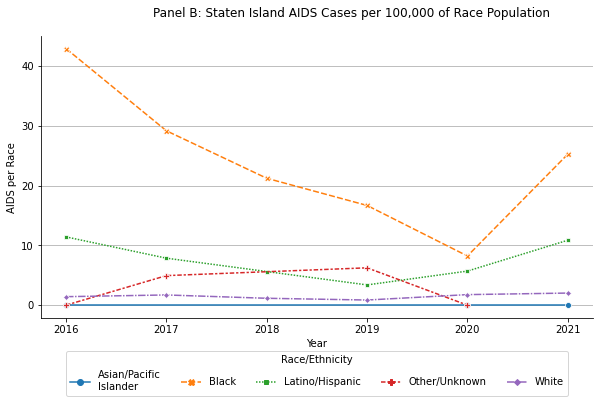

In [134]:
g = sns.relplot(x="Year", y= "AIDS per Race", hue = "Race/Ethinicity",kind = "line",style ="Race/Ethinicity", markers = True, data = si_per_races, ci = None, aspect = 1.7)
g.fig.suptitle("Panel B: Staten Island AIDS Cases per 100,000 of Race Population")
g.set_axis_labels("Year", "AIDS per Race") 
g.set_titles("") 
g.set(xticks= si_per_races["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Race/Ethnicity", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5) 
plt.grid(axis = "y")

In [68]:
si_per_races.groupby("Race/Ethinicity").mean() 

,Year,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
Race/Ethinicity,,,,,,
Asian/Pacific\nIslander,2019.0,2.000000,0.000000,48749.666667,4.067122,0.000000
Black,2018.5,18.666667,11.666667,48586.500000,38.361546,23.916849
Latino/Hispanic,2018.5,9.833333,6.666667,88995.333333,11.073056,7.474668
Other/Unknown,2018.0,1.500000,0.500000,19280.750000,7.616178,2.797312
White,2018.5,9.666667,5.000000,339874.666667,2.845674,1.486007


In [69]:
si_per_races.groupby("Race/Ethinicity").sum() 

,Year,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
Race/Ethinicity,,,,,,
Asian/Pacific\nIslander,6057,6,0,146249,12.201366,0.000000
Black,12111,112,70,291519,230.169273,143.501096
Latino/Hispanic,12111,59,40,533972,66.438335,44.848008
Other/Unknown,8072,6,2,77123,30.464714,11.189250
White,12111,58,30,2039248,17.074042,8.916041


In [70]:
#comparison between blacks and latinos 

black_lh =by_population[(by_population["Race/Ethinicity"] == 'Black') | (by_population["Race/Ethinicity"] =='Latino/Hispanic')]
black_lh

,Year,Borough,Race/Ethinicity,HIV Diagnoses,AIDS Diagnoses,Race Population,HIV per Race,AIDS per Race
2948,2016,Bronx,Black,234,162,495031,47.269767,32.725223
2949,2016,Bronx,Latino/Hispanic,231,160,815422,28.328890,19.621742
3092,2016,Brooklyn,Black,348,210,861749,40.382989,24.369045
3093,2016,Brooklyn,Latino/Hispanic,106,73,505183,20.982495,14.450209
3308,2016,Manhattan,Black,117,93,246095,47.542616,37.790284
3309,2016,Manhattan,Latino/Hispanic,155,77,427224,36.280733,18.023332
3506,2016,Queens,Black,97,70,421307,23.023591,16.614962
3507,2016,Queens,Latino/Hispanic,190,87,653694,29.065587,13.308979
3704,2016,Staten\nIsland,Black,34,21,48920,69.501226,42.927228
3705,2016,Staten\nIsland,Latino/Hispanic,21,10,87567,23.981637,11.419827


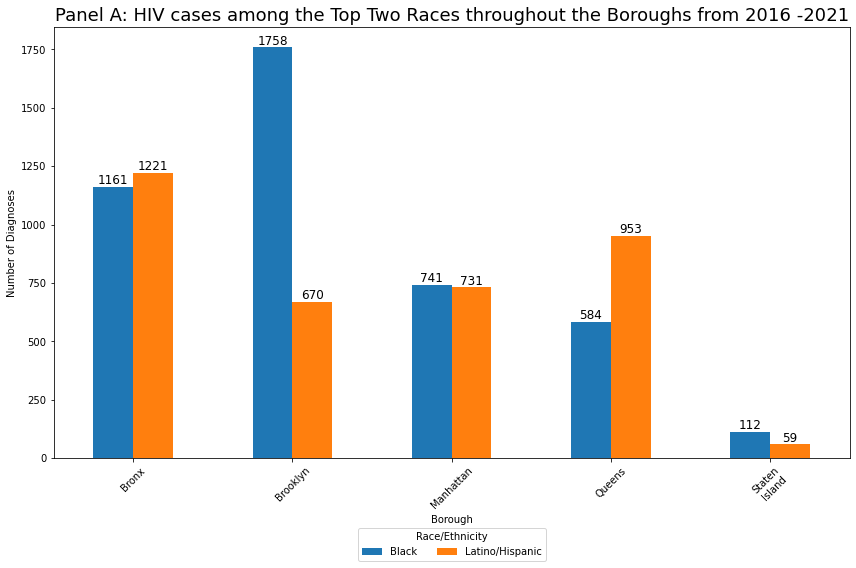

In [71]:
black_lh_county = black_lh.groupby(["Borough", "Race/Ethinicity"])["HIV Diagnoses"].sum().unstack()
th = black_lh_county.plot(kind = 'bar', figsize = (12,8))
plt.title("Panel A: HIV cases among the Top Two Races throughout the Boroughs from 2016 -2021", fontsize = 18 )
plt.xlabel('Borough')
plt.ylabel('Number of Diagnoses')
plt.legend(title='Race/Ethnicity',loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xticks(rotation = 45)
# Add value labels
for container in th.containers:
    th.bar_label(container, label_type='edge', fontsize = 12)
plt.tight_layout()


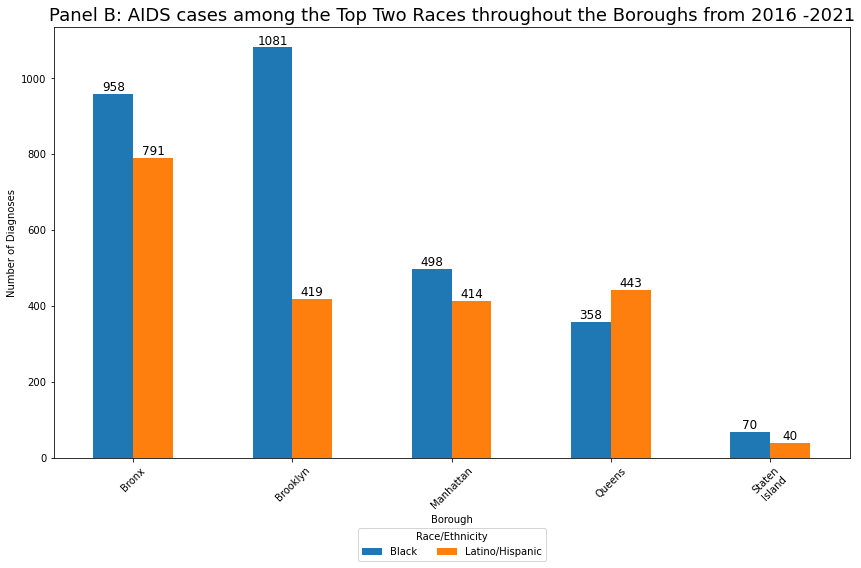

In [72]:
black_lh_county = black_lh.groupby(["Borough", "Race/Ethinicity"])["AIDS Diagnoses"].sum().unstack()
ta = black_lh_county.plot(kind = 'bar',figsize = (12,8))
plt.title("Panel B: AIDS cases among the Top Two Races throughout the Boroughs from 2016 -2021", fontsize = 18)

plt.xlabel('Borough')
plt.ylabel('Number of Diagnoses')
plt.legend(title='Race/Ethnicity',loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xticks(rotation = 45)

for container in ta.containers:
    ta.bar_label(container, label_type='edge', fontsize = 12)
plt.tight_layout()


In [73]:
hood_filter = nyc[(nyc["Neighborhood"] != "All") & (nyc["Race/Ethinicity"] == "All") & (nyc["Sex"] == "All")]
hood_filter = hood_filter.drop([6492,6510,6438,6528,6420,6456,6474,6708,
                                6654,6564,6690,6727,6600,6672,6618,6582,6636,6745,6944,
                                7644,6817,6926,7770,6799,7698,6854,6890,6872,
                               7052,7140,6998,7070,7016,7124,7034,7106,7950,
                               7176,7212,7230,7194])
#pd.set_option('display.max_rows', None)
hood_filter

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2964,2016,Bronx,Crotona - Tremont,All,All,87,50.5,16,18.4,65,37.7
2982,2016,Bronx,Fordham - Bronx\nPark,All,All,104,48.3,20,19.2,60,27.8
3000,2016,Bronx,High Bridge -\nMorrisania,All,All,94,54.2,21,22.3,80,46.1
3018,2016,Bronx,Hunts Point - Mott\nHaven,All,All,68,60.8,9,13.2,45,40.2
3036,2016,Bronx,Kingsbridge -\nRiverdale,All,All,14,17.4,1,7.1,3,3.7
...,...,...,...,...,...,...,...,...,...,...,...
8868,2021,Queens,West Queens,All,All,86,22.0,20,23.3,55,14.1
8904,2021,Staten\nIsland,Port Richmond,All,All,9,15.3,3,33.3,7,11.9
8922,2021,Staten\nIsland,South Beach -\nTottenville,All,All,10,5.9,4,40.0,5,3.0
8940,2021,Staten\nIsland,Stapleton - St.\nGeorge,All,All,17,15.5,3,17.6,13,11.9


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

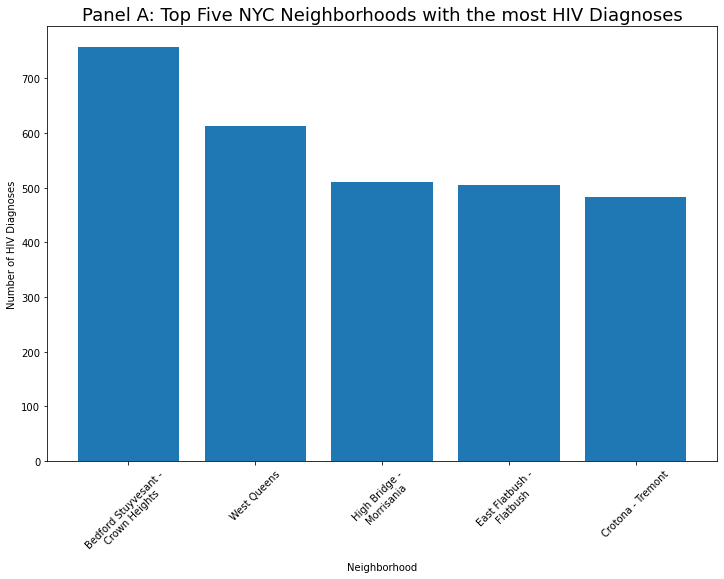

In [140]:
hiv_hood_counts = hood_filter.groupby(["Neighborhood"])["HIV Diagnoses"].sum().reset_index()
top_hiv_hoods = hiv_hood_counts.sort_values("HIV Diagnoses", ascending = False).head(5)

plt.figure(figsize=(12, 8)) 
plt.bar(top_hiv_hoods["Neighborhood"], top_hiv_hoods ["HIV Diagnoses"])
plt.title("Panel A: Top Five NYC Neighborhoods with the most HIV Diagnoses", fontsize = 18)
plt.xlabel('Neighborhood')
plt.ylabel('Number of HIV Diagnoses')
plt.xticks(rotation = 45)

In [75]:
top_hiv_hoods
#2 Bronx neighborhoods in top 5 nyc

,Neighborhood,HIV Diagnoses
1,Bedford Stuyvesant -\nCrown Heights,757
39,West Queens,612
19,High Bridge -\nMorrisania,511
10,East Flatbush -\nFlatbush,504
8,Crotona - Tremont,482


In [76]:
#Data frame for the top 5 hoods with the highest HIV cases
nyc_top_hood = hood_filter[(hood_filter["Neighborhood"] == "Bedford Stuyvesant -\nCrown Heights") | (hood_filter["Neighborhood"] == "West Queens") | (hood_filter["Neighborhood"] == "High Bridge -\nMorrisania") | (hood_filter["Neighborhood"] == "East Flatbush -\nFlatbush") | (hood_filter["Neighborhood"] == "Crotona - Tremont")]	
nyc_top_hood

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2964,2016,Bronx,Crotona - Tremont,All,All,87,50.5,16,18.4,65,37.7
3000,2016,Bronx,High Bridge -\nMorrisania,All,All,94,54.2,21,22.3,80,46.1
3108,2016,Brooklyn,Bedford Stuyvesant -\nCrown Heights,All,All,170,60.1,36,21.2,96,33.9
3217,2016,Brooklyn,East Flatbush -\nFlatbush,All,All,88,34.9,20,22.7,55,21.8
3684,2016,Queens,West Queens,All,All,132,34.3,22,16.7,63,16.4
3828,2017,Bronx,Crotona - Tremont,All,All,83,48.2,9,10.8,58,33.7
3864,2017,Bronx,High Bridge -\nMorrisania,All,All,79,45.6,17,21.5,74,42.7
3972,2017,Brooklyn,Bedford Stuyvesant -\nCrown Heights,All,All,130,46.3,29,22.3,92,32.8
4080,2017,Brooklyn,East Flatbush -\nFlatbush,All,All,94,37.5,22,23.4,57,22.7
4548,2017,Queens,West Queens,All,All,120,31.3,27,22.5,55,14.4


In [77]:
nyc_top_hood.groupby("Neighborhood").mean() 

,Year,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
Neighborhood,,,,,,,
Bedford Stuyvesant -\nCrown Heights,2018.5,126.166667,44.566667,24.666667,19.466667,77.500000,27.383333
Crotona - Tremont,2018.5,80.333333,46.850000,11.000000,13.633333,65.833333,38.383333
East Flatbush -\nFlatbush,2018.5,84.000000,33.383333,17.833333,21.416667,50.166667,19.916667
High Bridge -\nMorrisania,2018.5,85.166667,49.116667,17.166667,20.416667,66.166667,38.133333
West Queens,2018.5,102.000000,26.483333,22.500000,22.550000,53.500000,13.900000


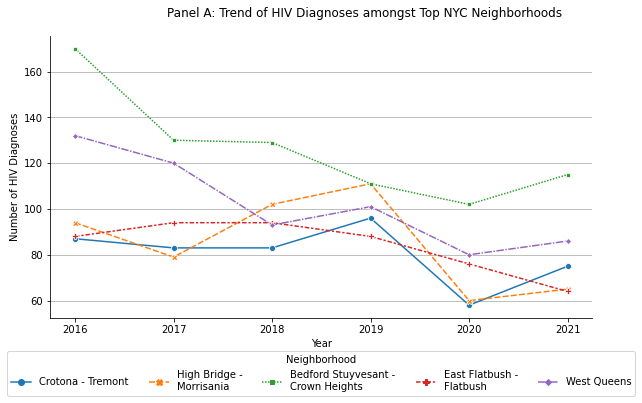

In [137]:
g = sns.relplot(x="Year",y = "HIV Diagnoses", hue = "Neighborhood", kind = "line",style ="Neighborhood", markers = True, data = nyc_top_hood, aspect = 1.7)
g.fig.suptitle("Panel A: Trend of HIV Diagnoses amongst Top NYC Neighborhoods")
g.set_axis_labels("Year", "Number of HIV Diagnoses") 
g.set_titles("") 
g.set(xticks= hood_filter["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Neighborhood", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol= 5)
plt.grid(axis = "y")

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

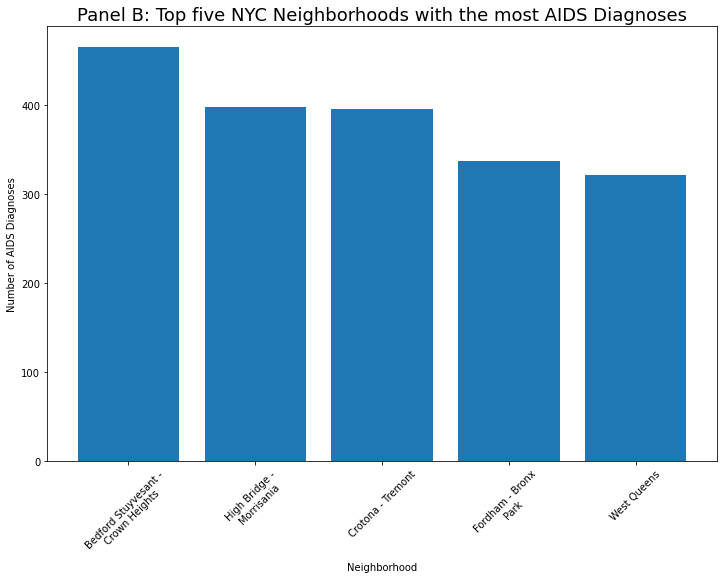

In [142]:
aids_hood_counts = hood_filter.groupby(["Neighborhood"])["AIDS Diagnoses"].sum().reset_index()
top_aids_hood = aids_hood_counts.sort_values("AIDS Diagnoses", ascending = False).head(5)

plt.figure(figsize=(12, 8))
plt.bar(top_aids_hood["Neighborhood"], top_aids_hood ["AIDS Diagnoses"])
plt.title("Panel B: Top five NYC Neighborhoods with the most AIDS Diagnoses", fontsize = 18)
plt.xlabel('Neighborhood')
plt.ylabel('Number of AIDS Diagnoses')
plt.xticks(rotation = 45)

In [80]:
top_aids_hood

,Neighborhood,AIDS Diagnoses
1,Bedford Stuyvesant -\nCrown Heights,465
19,High Bridge -\nMorrisania,397
8,Crotona - Tremont,395
14,Fordham - Bronx\nPark,337
39,West Queens,321


In [81]:
#Data frame for the top 5 hoods with the highest AIDS cases
nyc_top_aids = hood_filter[(hood_filter["Neighborhood"] == "Bedford Stuyvesant -\nCrown Heights") | (hood_filter["Neighborhood"] == "West Queens") | (hood_filter["Neighborhood"] == "High Bridge -\nMorrisania") | (hood_filter["Neighborhood"] == "Fordham - Bronx\nPark") | (hood_filter["Neighborhood"] == "Crotona - Tremont")]	
nyc_top_aids

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2964,2016,Bronx,Crotona - Tremont,All,All,87,50.5,16,18.4,65,37.7
2982,2016,Bronx,Fordham - Bronx\nPark,All,All,104,48.3,20,19.2,60,27.8
3000,2016,Bronx,High Bridge -\nMorrisania,All,All,94,54.2,21,22.3,80,46.1
3108,2016,Brooklyn,Bedford Stuyvesant -\nCrown Heights,All,All,170,60.1,36,21.2,96,33.9
3684,2016,Queens,West Queens,All,All,132,34.3,22,16.7,63,16.4
3828,2017,Bronx,Crotona - Tremont,All,All,83,48.2,9,10.8,58,33.7
3846,2017,Bronx,Fordham - Bronx\nPark,All,All,83,38.5,13,15.7,52,24.1
3864,2017,Bronx,High Bridge -\nMorrisania,All,All,79,45.6,17,21.5,74,42.7
3972,2017,Brooklyn,Bedford Stuyvesant -\nCrown Heights,All,All,130,46.3,29,22.3,92,32.8
4548,2017,Queens,West Queens,All,All,120,31.3,27,22.5,55,14.4


In [82]:
nyc_top_aids.groupby("Neighborhood").mean() 

,Year,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
Neighborhood,,,,,,,
Bedford Stuyvesant -\nCrown Heights,2018.5,126.166667,44.566667,24.666667,19.466667,77.500000,27.383333
Crotona - Tremont,2018.5,80.333333,46.850000,11.000000,13.633333,65.833333,38.383333
Fordham - Bronx\nPark,2018.5,80.000000,37.083333,16.000000,20.100000,56.166667,26.033333
High Bridge -\nMorrisania,2018.5,85.166667,49.116667,17.166667,20.416667,66.166667,38.133333
West Queens,2018.5,102.000000,26.483333,22.500000,22.550000,53.500000,13.900000


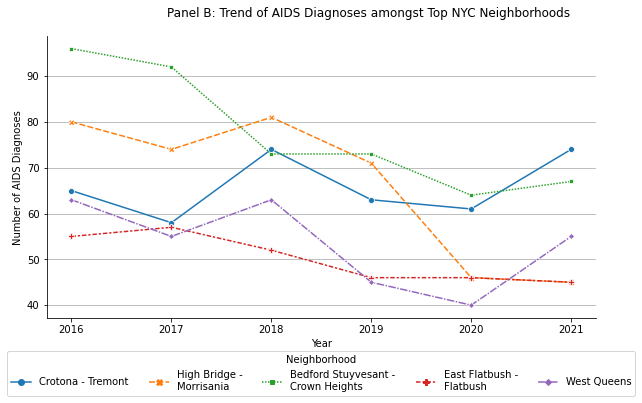

In [143]:
g = sns.relplot(x="Year",y = "AIDS Diagnoses", hue = "Neighborhood", kind = "line",style ="Neighborhood", markers = True, data = nyc_top_hood, aspect = 1.7)
g.fig.suptitle("Panel B: Trend of AIDS Diagnoses amongst Top NYC Neighborhoods")
g.set_axis_labels("Year", "Number of AIDS Diagnoses") 
g.set_titles("") 
g.set(xticks= hood_filter["Year"].unique())
g.fig.subplots_adjust(top=0.9)  
g._legend.remove() 
plt.legend(title="Neighborhood", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol= 5)
plt.grid(axis = "y")

In [84]:
#Create Bronx data frame
bronx_filter = nyc["Borough"] == "Bronx"

nyc_bronx = nyc[bronx_filter]
nyc_bronx

,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2946,2016,Bronx,All,All,All,489,41.5,94,19.2,337,28.6
2947,2016,Bronx,All,All,Asian/Pacific\nIslander,8,16.9,1,12.5,4,8.4
2948,2016,Bronx,All,All,Black,234,66.7,56,23.9,162,46.2
2949,2016,Bronx,All,All,Latino/Hispanic,231,35.7,36,15.6,160,24.8
2950,2016,Bronx,All,All,Other/Unknown,3,22.7,1,33.3,2,15.2
...,...,...,...,...,...,...,...,...,...,...,...
8268,2021,Bronx,Pelham - Throgs\nNeck,Male,All,40,34.0,10,25.0,27,22.9
8269,2021,Bronx,Pelham - Throgs\nNeck,Male,Asian/Pacific\nIslander,2,18.1,1,50.0,1,9.1
8270,2021,Bronx,Pelham - Throgs\nNeck,Male,Black,14,61.1,6,42.9,16,69.8
8271,2021,Bronx,Pelham - Throgs\nNeck,Male,Latino/Hispanic,20,32.3,2,10.0,9,14.6


In [85]:
nyc_bronx.describe()

,Year,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,2018.669604,32.955947,41.632452,5.801762,16.860940,24.461087,30.345521
std,1.700632,60.456823,37.663992,10.937539,17.869581,43.630622,29.766380
min,2016.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,16.400000,0.000000,0.000000,2.000000,11.200000
50%,2019.000000,13.000000,32.000000,2.000000,15.900000,11.000000,22.200000
75%,2020.000000,36.000000,55.800000,6.000000,22.200000,26.000000,40.700000
max,2021.000000,489.000000,394.200000,94.000000,100.000000,341.000000,222.100000


In [86]:
nyc_bronx.describe(include = ["O"])

,Borough,Neighborhood,Sex,Race/Ethinicity
count,681,681,681,681
unique,1,8,3,6
top,Bronx,All,All,All
freq,681,107,257,165


In [87]:
nyc_bronx.dtypes

Year                               int64
Borough                           object
Neighborhood                      object
Sex                               object
Race/Ethinicity                   object
HIV Diagnoses                      int64
HIV per 100,000                  float64
Concurrent HIV/AIDS Diagnoses      int64
Proportion of concurrent         float64
AIDS Diagnoses                     int64
AIDS per 100,000                 float64
dtype: object

Text(0, 0.5, '# of Patients')

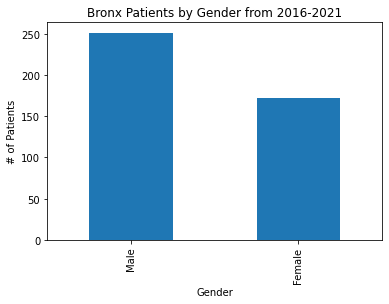

In [88]:
sex_filter = nyc_bronx["Sex"] == "All"
gender = nyc_bronx[~sex_filter]
#gender 424 in total

sex_count = gender["Sex"].value_counts()
sex_count.plot(kind = "bar")
plt.title("Bronx Patients by Gender from 2016-2021")
plt.xlabel("Gender")
plt.ylabel("# of Patients")

In [89]:
gender


,Year,Borough,Neighborhood,Sex,Race/Ethinicity,HIV Diagnoses,"HIV per 100,000",Concurrent HIV/AIDS Diagnoses,Proportion of concurrent,AIDS Diagnoses,"AIDS per 100,000"
2952,2016,Bronx,All,Female,All,137,21.5,25,18.2,120,18.9
2954,2016,Bronx,All,Female,Black,76,39.3,16,21.1,59,30.5
2955,2016,Bronx,All,Female,Latino/Hispanic,59,16.9,9,15.3,56,16.0
2957,2016,Bronx,All,Female,White,2,3.2,0,0.0,3,4.8
2958,2016,Bronx,All,Male,All,352,65.0,69,19.6,217,40.1
...,...,...,...,...,...,...,...,...,...,...,...
8268,2021,Bronx,Pelham - Throgs\nNeck,Male,All,40,34.0,10,25.0,27,22.9
8269,2021,Bronx,Pelham - Throgs\nNeck,Male,Asian/Pacific\nIslander,2,18.1,1,50.0,1,9.1
8270,2021,Bronx,Pelham - Throgs\nNeck,Male,Black,14,61.1,6,42.9,16,69.8
8271,2021,Bronx,Pelham - Throgs\nNeck,Male,Latino/Hispanic,20,32.3,2,10.0,9,14.6


In [ ]:
#Heat Chart for neighborhoods in 2021